In [59]:
# import libraries and modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score
from sklearn.datasets import load_wine

load_wine()

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [60]:
# load_wine data set
data = load_wine()
dataset = pd.DataFrame(data=data['data'], columns=data['feature_names'])
dataset



,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [61]:
# Set x and y variables, and train_test_split
X = dataset.copy()
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [62]:
# Set estimator and fit to training set
dtc = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=2, random_state=100, ccp_alpha=0)
dtc = dtc.fit(X_train, y_train)
dtc

DecisionTreeClassifier(ccp_alpha=0, criterion='entropy', max_depth=2,
                       random_state=100, splitter='random')

In [63]:
dtc.get_params()

{'ccp_alpha': 0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 100,
 'splitter': 'random'}

In [64]:
# predict probability of each label ('class_0', 'class_1', 'class_2') in training set row
dtc.predict_proba(X_train)

array([[0.23076923, 0.73846154, 0.03076923],
       [0.23076923, 0.73846154, 0.03076923],
       [0.        , 0.06060606, 0.93939394],
       [0.        , 0.06060606, 0.93939394],
       [0.23076923, 0.73846154, 0.03076923],
       [0.        , 0.06060606, 0.93939394],
       [0.        , 0.06060606, 0.93939394],
       [0.        , 0.06060606, 0.93939394],
       [0.23076923, 0.73846154, 0.03076923],
       [0.        , 0.06060606, 0.93939394],
       [0.        , 0.06060606, 0.93939394],
       [0.23076923, 0.73846154, 0.03076923],
       [0.9       , 0.05      , 0.05      ],
       [0.9       , 0.05      , 0.05      ],
       [0.23076923, 0.73846154, 0.03076923],
       [0.23076923, 0.73846154, 0.03076923],
       [0.9       , 0.05      , 0.05      ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.06060606, 0.93939394],
       [0.23076923, 0.73846154, 0.03076923],
       [0.9       , 0.05      , 0.05      ],
       [0.9       , 0.05      , 0.05      ],
       [0.

In [65]:
# Make predictions with estimator
predictions = dtc.predict(X_train)
predictions

array([1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 0, 0, 1, 1, 0, 1, 2, 1, 0, 0,
       1, 1, 1, 2, 0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 1, 0, 0, 2, 2, 1, 0, 1, 1, 0, 0,
       2, 2, 2, 0, 2, 1, 1, 2, 0, 1, 1, 0, 1, 0, 1, 1, 2, 1, 2, 1, 0, 1,
       2, 2, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 2, 1, 0,
       2, 2, 1, 1, 1, 0, 1, 2, 1, 2, 1, 1, 2, 2, 0, 1, 1, 2, 2, 1, 0, 0,
       0, 1, 1, 2, 1, 1, 1, 1, 1, 0])

In [66]:
recall_score(y_train, predictions, average='weighted')

np.float64(0.8380281690140845)

In [67]:
precision_score(y_train, predictions, average='weighted')

np.float64(0.8519837072500881)

In [68]:
confusion_matrix(y_train, predictions, labels=[0, 1, 2])

array([[36, 15,  0],
       [ 2, 52,  2],
       [ 2,  2, 31]])

In [69]:
# Overall classification report of estimator performance
print(classification_report(y_train, predictions, target_names=['class_0', 'class_1', 'class_2']))

              precision    recall  f1-score   support

     class_0       0.90      0.71      0.79        51
     class_1       0.75      0.93      0.83        56
     class_2       0.94      0.89      0.91        35

    accuracy                           0.84       142
   macro avg       0.86      0.84      0.84       142
weighted avg       0.85      0.84      0.84       142



In [70]:
# Choose paramaters for hyperoptimization via GridSearchCV
p_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'ccp_alpha': np.arange(0, 1, 0.1),
}
# Use GridSearchCV estimator to test parameters with cross validation value of 5
grid = GridSearchCV(dtc, param_grid=p_grid, cv=5)
print(grid)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(ccp_alpha=0, criterion='entropy',
                                              max_depth=2, random_state=100,
                                              splitter='random'),
             param_grid={'ccp_alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'splitter': ['best', 'random']})


In [71]:
# GridSearchCV test scores ranked in a Pandas DataFrame
grid.fit(X_train, y_train)
pd.DataFrame(grid.cv_results_).iloc[:,4:].sort_values('rank_test_score')

,param_ccp_alpha,param_criterion,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.0,entropy,best,"{'ccp_alpha': 0.0, 'criterion': 'entropy', 'sp...",0.896552,0.965517,0.892857,0.964286,0.964286,0.936700,0.034312,1
4,0.0,log_loss,best,"{'ccp_alpha': 0.0, 'criterion': 'log_loss', 's...",0.896552,0.965517,0.892857,0.964286,0.964286,0.936700,0.034312,1
8,0.1,entropy,best,"{'ccp_alpha': 0.1, 'criterion': 'entropy', 'sp...",0.896552,0.965517,0.892857,0.964286,0.964286,0.936700,0.034312,1
10,0.1,log_loss,best,"{'ccp_alpha': 0.1, 'criterion': 'log_loss', 's...",0.896552,0.965517,0.892857,0.964286,0.964286,0.936700,0.034312,1
16,0.2,log_loss,best,"{'ccp_alpha': 0.2, 'criterion': 'log_loss', 's...",0.896552,0.931034,0.892857,0.964286,0.928571,0.922660,0.026106,5
14,0.2,entropy,best,"{'ccp_alpha': 0.2, 'criterion': 'entropy', 'sp...",0.896552,0.931034,0.892857,0.964286,0.928571,0.922660,0.026106,5
22,0.3,log_loss,best,"{'ccp_alpha': 0.30000000000000004, 'criterion'...",0.896552,0.931034,0.857143,0.964286,0.928571,0.915517,0.036213,7
20,0.3,entropy,best,"{'ccp_alpha': 0.30000000000000004, 'criterion'...",0.896552,0.931034,0.857143,0.964286,0.928571,0.915517,0.036213,7
0,0.0,gini,best,"{'ccp_alpha': 0.0, 'criterion': 'gini', 'split...",0.896552,0.827586,0.892857,0.928571,0.928571,0.894828,0.036893,9
6,0.1,gini,best,"{'ccp_alpha': 0.1, 'criterion': 'gini', 'split...",0.896552,0.827586,0.892857,0.892857,0.857143,0.873399,0.027042,10


In [72]:
# Determine the best paramters for chosen estimator
grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=np.float64(0.0), criterion='entropy',
                       max_depth=2, random_state=100)

In [73]:
grid.best_score_

np.float64(0.9366995073891626)

In [74]:
best_model = grid.best_estimator_

In [75]:
# Use estimator to predict labels after hyperparameter optimization
best_predictions = best_model.predict(X_train)
best_predictions

array([1, 1, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 1, 0, 1, 2, 2, 0, 0,
       1, 1, 0, 2, 0, 1, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 2, 2, 0, 1, 2, 0, 2, 2, 1, 0, 0, 1, 0, 0,
       2, 2, 2, 0, 2, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1,
       2, 2, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 2, 1, 0,
       2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 0, 1, 1, 2, 2, 0, 0, 1,
       0, 1, 1, 2, 1, 1, 1, 1, 0, 0])

In [76]:
recall_score(y_train, best_predictions, average='weighted')

np.float64(0.9788732394366197)

In [77]:
precision_score(y_train, best_predictions, average='weighted')

np.float64(0.9789794909809735)

In [78]:
confusion_matrix(y_train, best_predictions, labels=[0, 1, 2])

array([[49,  2,  0],
       [ 1, 55,  0],
       [ 0,  0, 35]])

In [79]:
# Overall classification report gives us higher metrics on comparison to un-optimized estimator
print(classification_report(y_train, best_predictions, target_names=['class_0', 'class_1', 'class_2']))

              precision    recall  f1-score   support

     class_0       0.98      0.96      0.97        51
     class_1       0.96      0.98      0.97        56
     class_2       1.00      1.00      1.00        35

    accuracy                           0.98       142
   macro avg       0.98      0.98      0.98       142
weighted avg       0.98      0.98      0.98       142



In [80]:
feature_names = X.columns
feature_names

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [81]:
# Rank feature importance based on feature_importances_
feature_importance = pd.DataFrame(best_model.feature_importances_, index=feature_names).sort_values(0, ascending=False)
feature_importance

,0
flavanoids,0.493546
proline,0.414289
color_intensity,0.092165
alcohol,0.000000
malic_acid,0.000000
ash,0.000000
alcalinity_of_ash,0.000000
magnesium,0.000000
total_phenols,0.000000
nonflavanoid_phenols,0.000000


In [82]:
features = list(feature_importance[feature_importance[0]>0].index)
features

['flavanoids', 'proline', 'color_intensity']

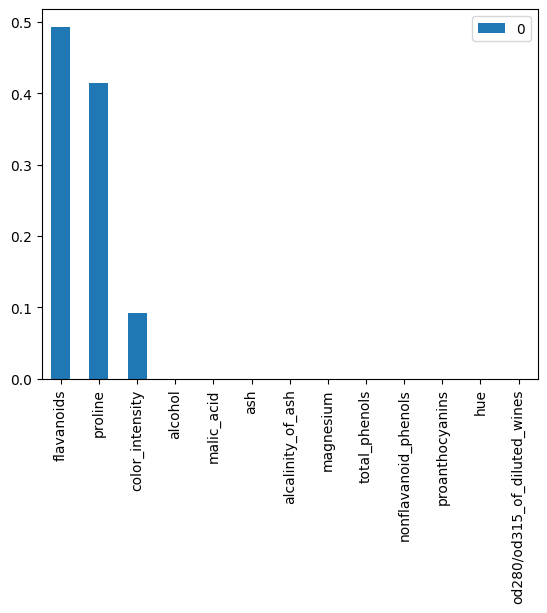

In [83]:
feature_importance.head(13).plot(kind='bar')
plt.show()

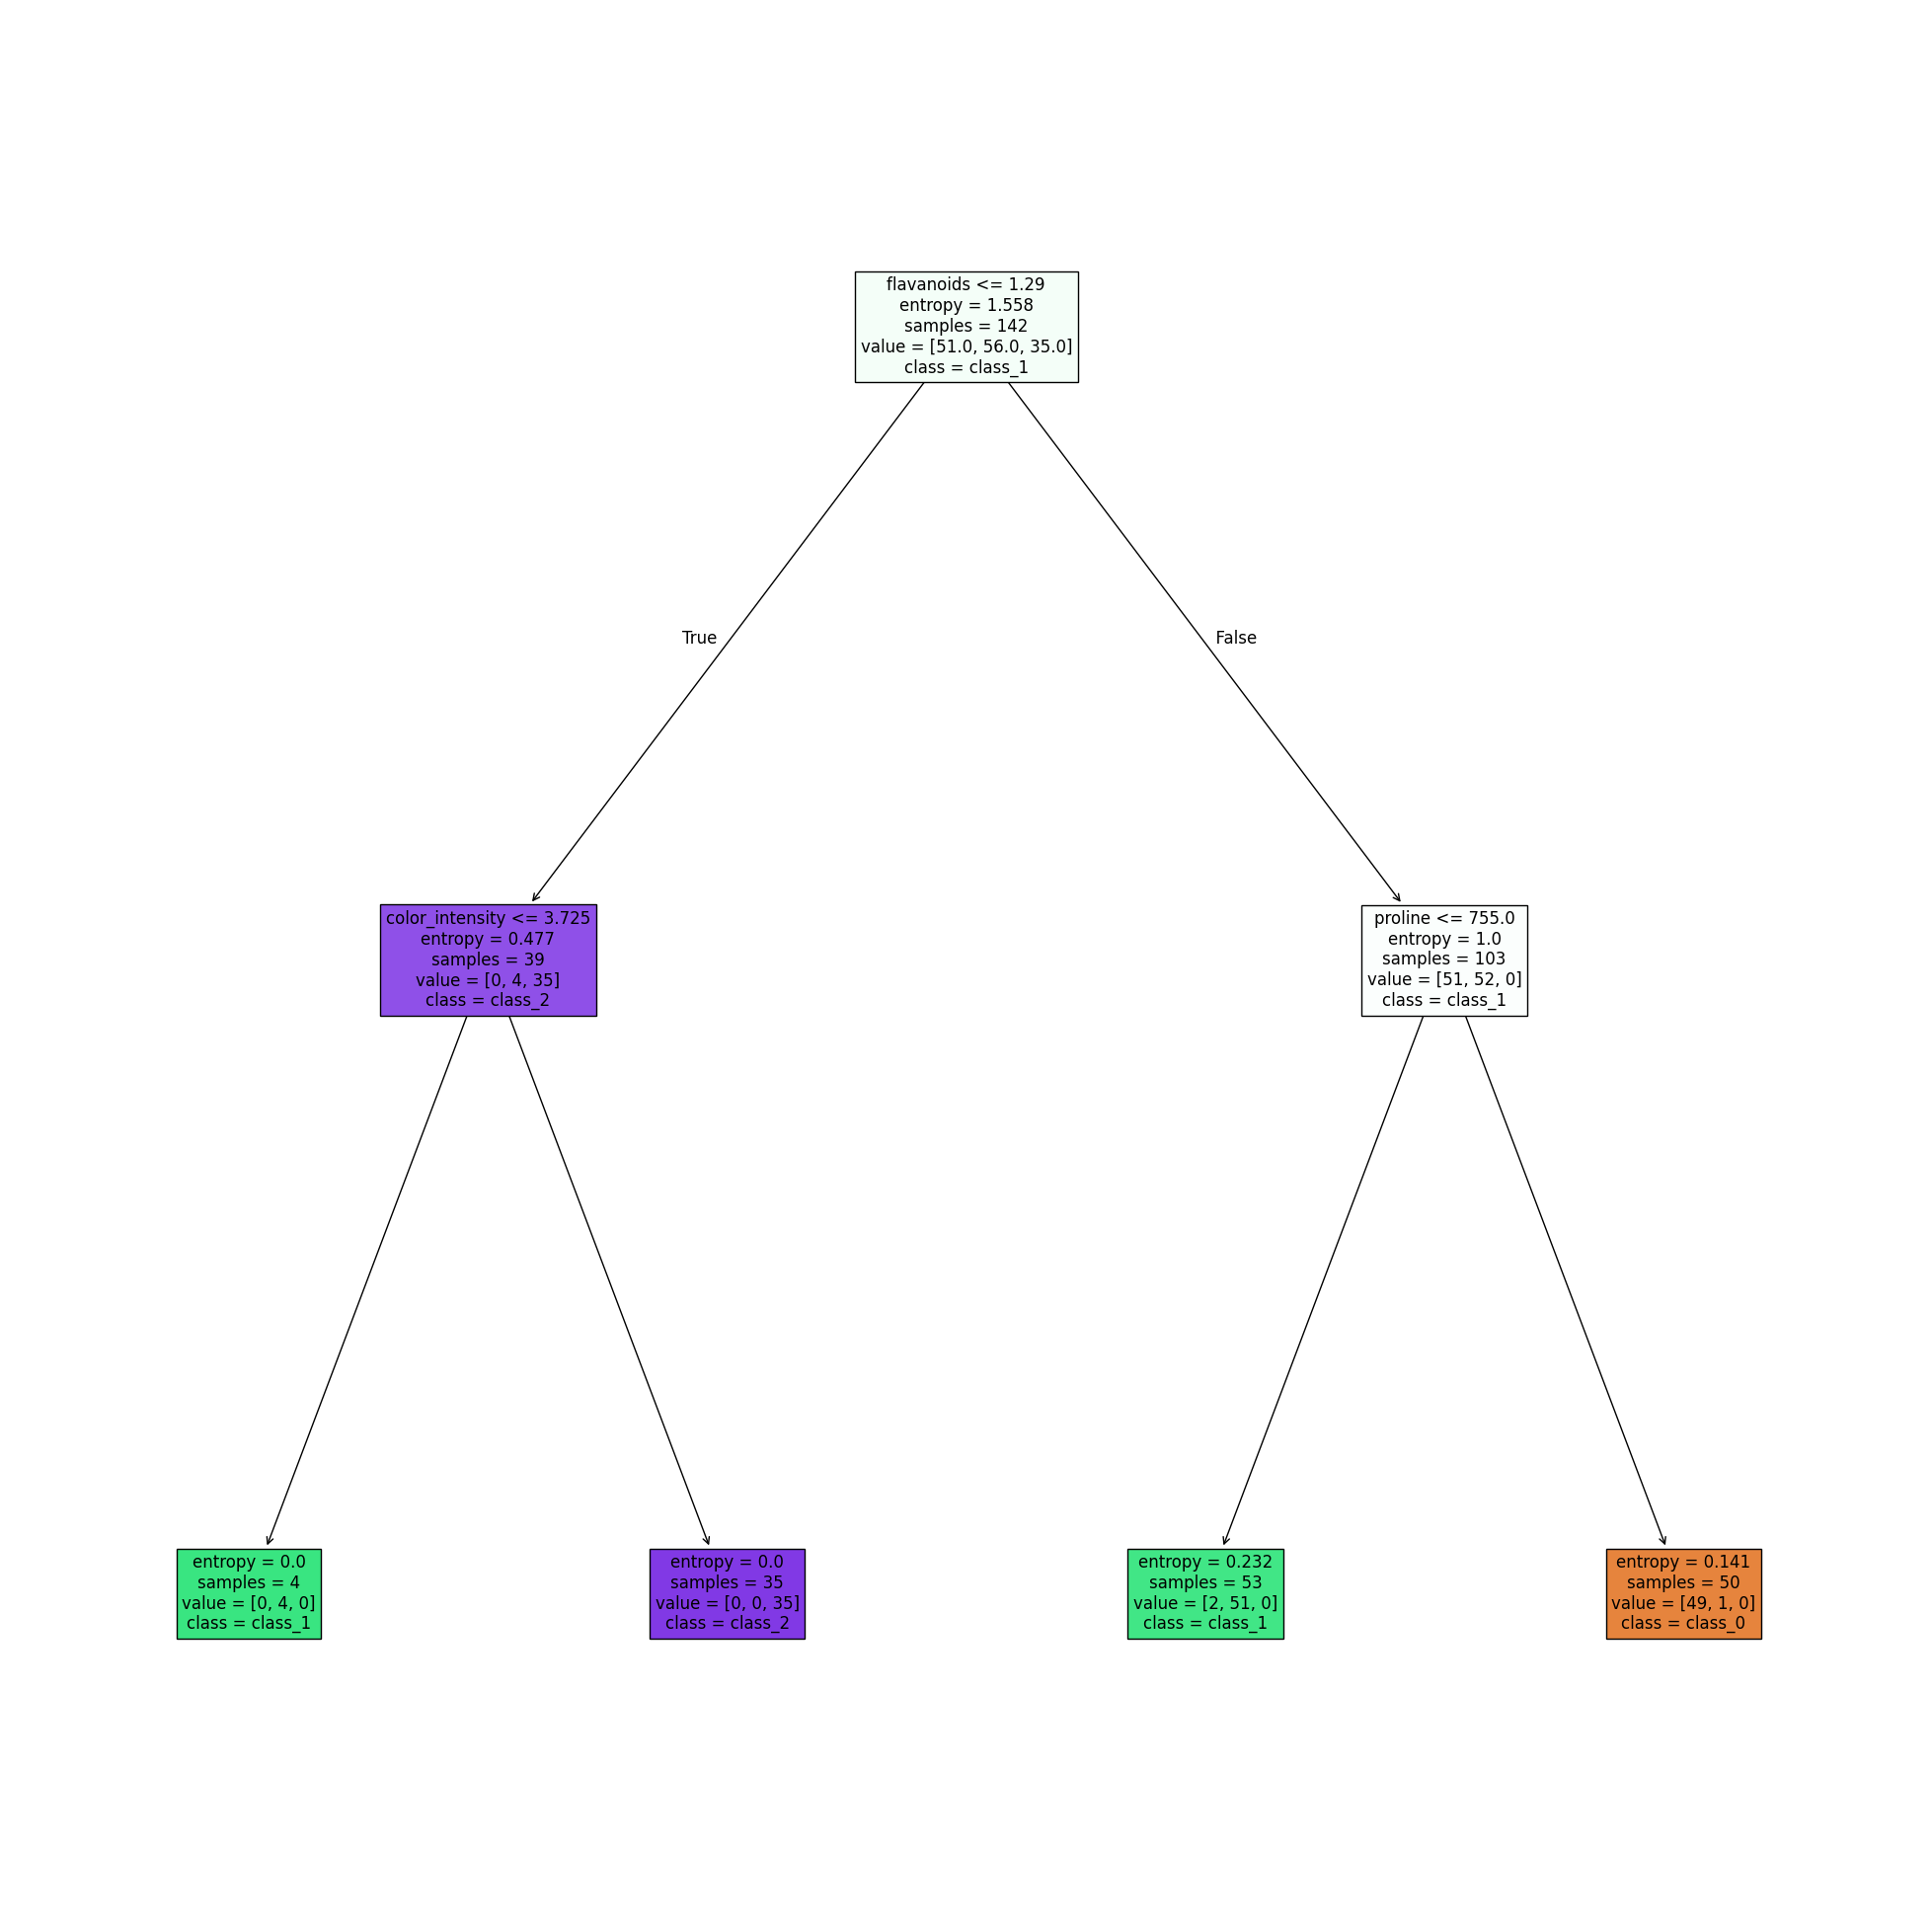

In [84]:
# Plot a plot of the estimators (DecisionClassfierTree) predictions based on feature values
fig = plt.figure(figsize=(25,25))
_ = tree.plot_tree(best_model,
                   feature_names=feature_names,
                   class_names={0: 'class_0', 1: 'class_1', 2: 'class_2'},
                   filled=True,
                   fontsize=12)
plt.show()